In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import layers, models

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [5]:
df = tf.keras.preprocessing.image_dataset_from_directory("data",
                                                        shuffle=True,
                                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        batch_size=BATCH_SIZE)
                                                         

Found 10407 files belonging to 10 classes.


In [6]:
class_names = df.class_names

In [7]:
class_names

['paddy_bacterial_leaf_blight',
 'paddy_bacterial_leaf_streak',
 'paddy_bacterial_panicle_blight',
 'paddy_blast',
 'paddy_brown_spot',
 'paddy_dead_heart',
 'paddy_downy_mildew',
 'paddy_hispa',
 'paddy_normal',
 'paddy_tungro']

In [8]:
len(df)

326

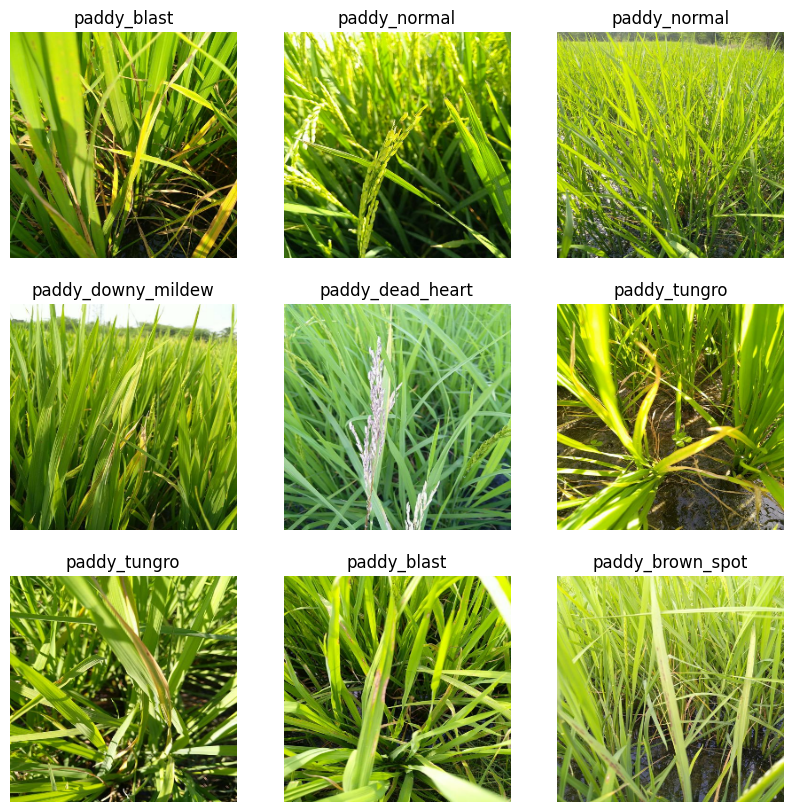

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
CHANNELS = 3

In [11]:
def data_partition(df,shufle = True,shuffle_size = 10000):
    if shufle:
        df = df.shuffle(shuffle_size,seed = 12)
    train_size = int(0.8 * len(df))
    val_size = int(0.1 * len(df))
    test_size = int(0.1 * len(df))
    train = df.take(train_size)
    val = df.skip(train_size).take(val_size)
    test = df.skip(train_size + val_size).take(test_size)
    return train, val, test

In [12]:
train, val, test = data_partition(df)

In [13]:
len(train), len(val), len(test)

(260, 32, 32)

In [14]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val = val.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
# tf.keras.applications.ResNet50(
#     include_top=True, weights='imagenet', input_tensor=None,
#     input_shape=None, pooling=None, classes=1000
# )

In [16]:
resiz_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = len(class_names)
model = models.Sequential([
    resiz_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape)

d:\CODING\Collage\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,346 (1.06 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [30]:
history = model.fit(
          train,
          validation_data=val,
          batch_size=BATCH_SIZE,
          epochs=30,
          verbose=1
          )

Epoch 1/30


d:\CODING\Collage\venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


260/260 ━━━━━━━━━━━━━━━━━━━━ 169s 625ms/step - accuracy: 0.2008 - loss: 2.1562 - val_accuracy: 0.3223 - val_loss: 1.9690
Epoch 2/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 162s 623ms/step - accuracy: 0.3198 - loss: 1.9210 - val_accuracy: 0.3213 - val_loss: 1.8485
Epoch 3/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 145s 557ms/step - accuracy: 0.3724 - loss: 1.7420 - val_accuracy: 0.3965 - val_loss: 1.7010
Epoch 4/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 147s 564ms/step - accuracy: 0.4181 - loss: 1.6689 - val_accuracy: 0.4365 - val_loss: 1.5898
Epoch 5/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 143s 549ms/step - accuracy: 0.4535 - loss: 1.5469 - val_accuracy: 0.4883 - val_loss: 1.5422
Epoch 6/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 140s 537ms/step - accuracy: 0.4880 - loss: 1.4648 - val_accuracy: 0.5117 - val_loss: 1.3786
Epoch 7/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 138s 531ms/step - accuracy: 0.5141 - loss: 1.3779 - val_accuracy: 0.5352 - val_loss: 1.3169
Epoch 8/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 139s 533ms/step - accuracy: 0.5197 - loss: 1.35

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 260}

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
epoches_range = range(30)

Text(0.5, 1.0, 'Training and Validation Loss')

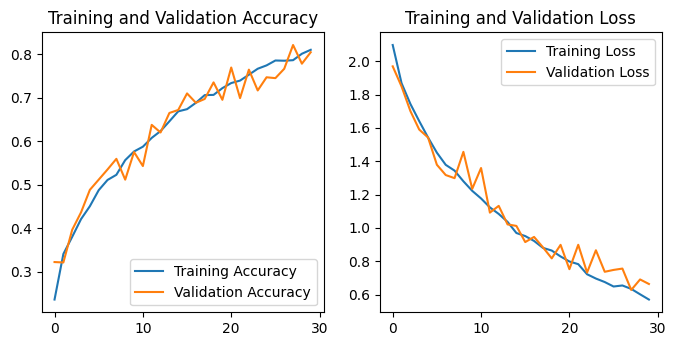

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epoches_range, acc, label='Training Accuracy')
plt.plot(epoches_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epoches_range, loss, label='Training Loss')
plt.plot(epoches_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [38]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions =  model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

In [39]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


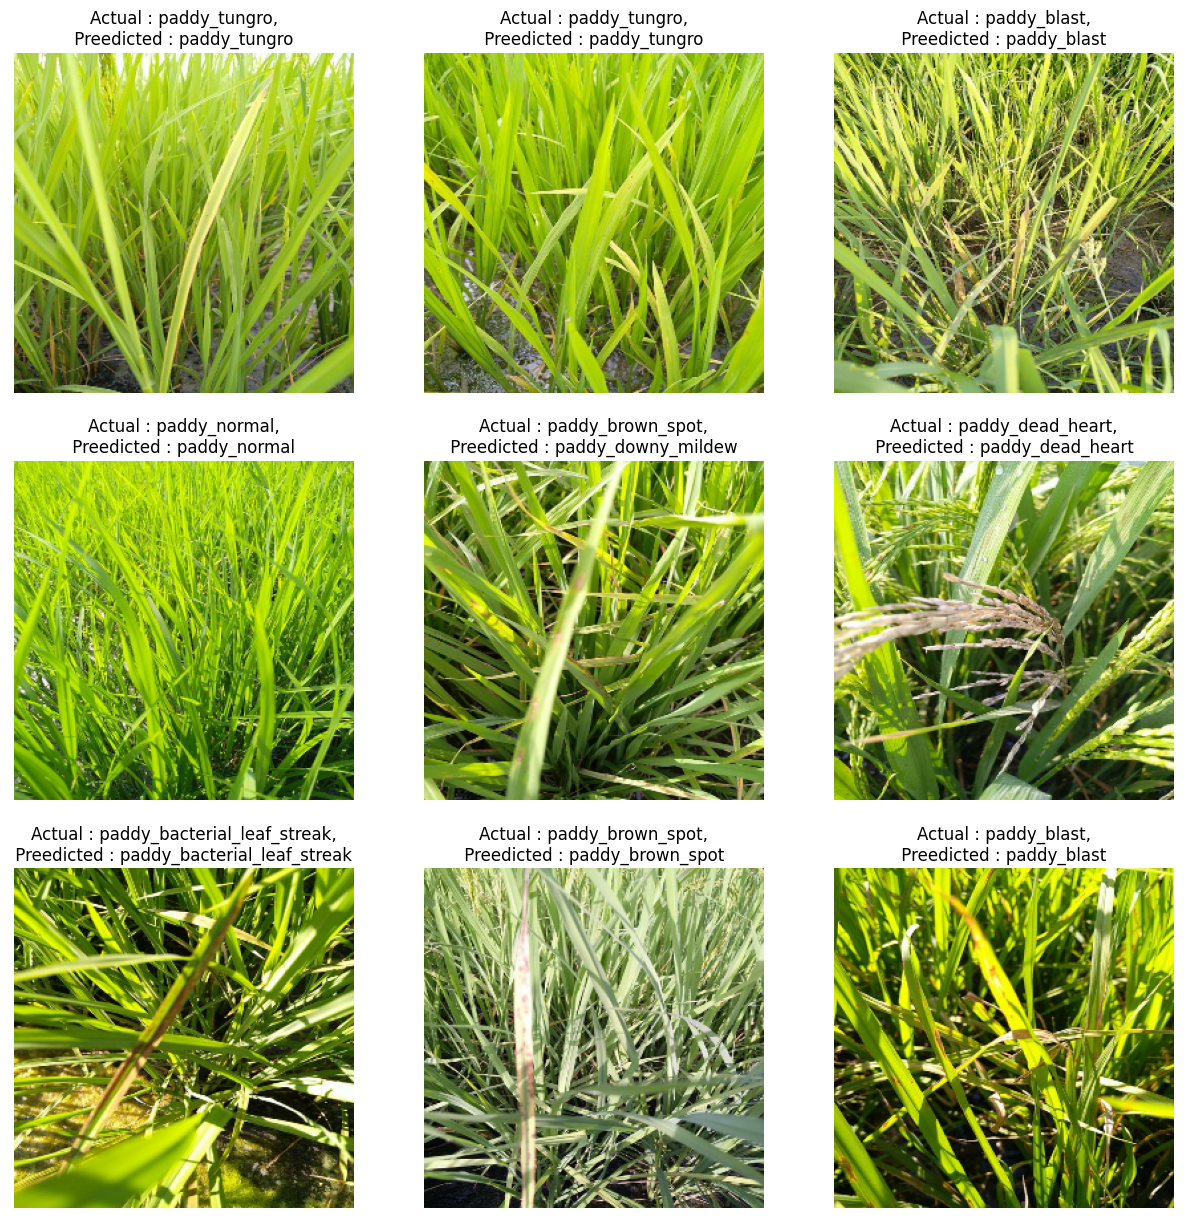

In [40]:
plt.figure(figsize=(15,15))
for images,labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1) 
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Preedicted : {predicted_class} ")
        plt.axis('off')


In [42]:
import os

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_version = max([int(i.split('.')[0]) for i in os.listdir(model_dir) if i.split('.')[0].isdigit()] + [0]) + 1
model.save(f"{model_dir}/{model_version}.h5")
# tf.saved_model.save(model,f"{model_dir}/{model_version}")


In [43]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']